# Diferenciação Numérica
from IPython.display import display, Math, Latex


## Conceito


A diferenciação é usada na obtenção dos máximos e mínimos de uma função.

• A teoria de Métodos Numéricos, solução por aproximação, é usada quando a diferenci-
ação de uma função é difícil ou impossível através de uma solução analítica.

• A diferenciação numérica é usada em um conjunto de pontos discretos, medidos ou
gravados em experimentos.


<img src="figures/dif2.png" width="35%">
<figcaption>Fonte: Gilat (2008)</figcaption>

<p><strong>Derivada por diferenças finitas</strong></p>
<p>A aproximação da derivada em um ponto $x_i$ se baseia nos valores dos pontos na vizinhança de $x_i$ .</p>
<ul>
    <li>A aproximação depende da precisão dos pontos, do espaçamento entre eles e da expressão específica utilizada na aproximação.</li>
    <li>A derivada no ponto $x_i$ é aproximada pela inclinação da reta que liga o ponto antes de $x_i$ ao ponto após $x_i$.</li>
    <li>Problemas de ruído penalizam este tipo de aproximação.</li>



<img src="figures/dif3.png" width="35%">
<figcaption>Fonte: Gilat (2008)</figcaption>

<p><strong>Definição do Cálculo </strong></p>
$$ \frac{df(x)}{dx} \Big|_{x=a}=f'(a)=\lim_{x \rightarrow a} \frac{f(x)-f(a)}{x-a}$$
<ul>
    <li>É o valor da inclinação da <strong>reta tangente</strong> à função em $x=a$, obtida com a escolha de um ponto $x$ próximo a $x = a$ e o cálculo da inclinação da reta que conecta os dois pontos.</li>
    <li>Aumenta à medida que $x \rightarrow a$ tal que no limite em que o ponto $x$ tende ao ponto $a$, a derivada é a inclinação da reta tangente a $f(x)$ em $x = a$.</li>

* Na <span style="color:blue;">aproximação de derivadas</span> usando diferenças finitas, valores da função em diferentes pontos na vizinhança do ponto $x = a$ são usados na estimativa da inclinação.
* As fórmulas de diferenças finitas progressiva, regressiva e central são as mais simples aproximações da derivada por diferenças finitas.
* Diferença finita
    * *Progressiva* de $x_{i+1}$ a $x_i$.
    * *Regressiva* de $x_{i}$ a $x_{i-1}$.
    * *Central* de $x_{i+1}$ a $x_{i-1}$.


<img src="figures/dif4.png" width="80%">
<figcaption>Fonte: Gilat (2008)</figcaption>


* Progressiva $\displaystyle \frac{df(x)}{dx} \Big|_{x=x_i}= \frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i}$

* <span style="color:blue;">
    Central $\displaystyle \frac{df(x)}{dx} \Big|_{x=x_i}= \frac{f(x_i)-f(x_{i-1})}{x_i-x_{i-1}}$
  </span>


* Regressiva $\displaystyle \frac{df(x)}{dx} \Big|_{x=x_i}= \frac{f(x_{i+1})-f(x_{i-1})}{x_{i+1}-x_{i-1}}$





**Considere a função $f(x) = x^3$.** 

Calcule numericamente a derivada primeira no ponto $x = 3$ aplicando as fórmulas de diferenças finitas progressiva, regressiva e central, utilizando os pontos:
* $x = 2$
* $x = 3$ 
* $x = 4$

Compare os resultados com a derivada exata (analítica).




**Diferenciação analítica: $f'(x)=3.x^2 = f'(3) = 3.3^2 = 27$**
 * [(a)]Diferenciação numérica: 
  
* Diferenciação finita progressiva: 
            $\displaystyle \frac{df(x)}{dx} \Big|_{x=3}= \frac{f(4)-f(3)}{4-3} = \frac{4^3-3^3}{1} = 37  \rightarrow Erro = \Big| \frac{37-27}{27}.100 \Big| = 37,04\%$
            
* Diferenciação finita regressiva: 
            $\displaystyle \frac{df(x)}{dx} \Big|_{x=3}= \frac{f(3)-f(2)}{3-2} =  \frac{3^3-2^3}{1} = 19 \rightarrow Erro = \Big| \frac{19-27}{27}.100 \Big| = 29,63\%$
            
* Diferenciação finita central: $\displaystyle \frac{df(x)}{dx} \Big|_{x=3}= \frac{f(4)-f(2)}{4-2} = \frac{4^3-2^3}{2} = 28 \rightarrow Erro = \Big| \frac{28-27}{27}.100 \Big| = 3,704\%$
            
* Erro_{relativo} =$\Big|\frac{Y_{aproximado}-Y_{real}}{Y_{real}}.100 \Big| = Y\%$  

# Códigos

## Código basilar em modo procedural

In [21]:
'''
Versão 03 - versão 02 utilizando métodos def
'''
import sympy as sp
# *****************************************************************************
# Lista de valores

def dados_entrada():
    entrada = input("Insira os pontos do domínio separados por vírgula: ").split(',')
    X = list(map(int, entrada))
    ponto_p= int(input("Informe o ponto de referência da lista para cálculo da derivada numérica"))

    # Função filtro para localizar o ponto_p na lista
    i=filter(lambda n:n == ponto_p,X)
    # Índice de locação do ponto na lista X
    i=X.index(ponto_p)

    return X,ponto_p,i

# Função para derivada analítica com auxílio da biblioteca sympy
def derivada(k): 
    x = sp.Symbol('x')
    fun = k(x)    
    dh=sp.diff(fun,x,1)              # Derivada primeira
    
    return sp.lambdify(x,dh,'numpy') 


def calculo_derivadas(f,X,ponto_p):
# # *****************************************************************************
# Derivada Analítica incluída automaticamente a partir da função 'derivada' criada
    df1=derivada(f)

    deriv = df1(ponto_p)
    # Derivada numérica
    dprog  =( f(X[i+1]) - f(X[i]) ) / (X[i+1]-X[i])
    dcentr =( f(X[i+1]) - f(X[i-1]))/ (X[i+1]-X[i-1])
    dregr  =( f(X[i]) - f(X[i-1]) ) / (X[i]-X[i-1])

    return dprog,dcentr,dregr,deriv    
# # *****************************************************************************
# Resultados

# # *****************************************************************************
# Resultados do erros
def calculo_erros(dprog,dcentr,dregr,deriv):
    E=[]
    for i in [dprog,dcentr,dregr]:
        E.append(round(abs(i-deriv)/deriv,2))    
    return E

def resultados(E,dprog,dcentr,dregr,deriv):
    print('-'*50)
    print("RESULTADOS:")
    print('-'*50)
    print("Dif.Analítica \tDif.Prog\tDif.Central\tDif.Regr")
    print(f" \t{deriv}\t  {dprog}         \t  {dcentr}     \t   {dregr}")
    print(f"\n Erros:\t\t {E[0]*100}%    \t  {E[1]*100}%     \t   {E[2]*100}%")


if __name__ == "__main__":    
    # Função de análise
    f=lambda x:x**3
    # *****************************************************************************
    X,ponto_p,i = dados_entrada()       
    dprog,dcentr,dregr,deriv = calculo_derivadas(f,X,ponto_p)
    E=calculo_erros(dprog,dcentr,dregr,deriv)
    resultados(E,dprog,dcentr,dregr,deriv)

Insira os pontos do domínio separados por vírgula:  21,22,23,24,25
Informe o ponto de referência da lista para cálculo da derivada numérica 23


--------------------------------------------------
RESULTADOS:
--------------------------------------------------
Dif.Analítica 	Dif.Prog	Dif.Central	Dif.Regr
 	1587	  1657.0         	  1588.0     	   1519.0

 Erros:		 4.0%    	  0.0%     	   4.0%


## Código basilar utilizando classes

In [7]:
'''
Versão 02 - Solução em classe com  o método construtor init e variáveis globais (self)
'''
import sympy as sp

class DifNumeric():
    def __init__(self,f):
        
        self.f=f
        self.X=None
        self.dados_entrada()       
        self.calculo_derivadas()
        self.calculo_erros()
        self.resultados()    
    
# Lista de valores
    def dados_entrada(self):
        entrada = input("Insira os pontos do domínio separados por vírgula: ").split(',')
        X = list(map(int, entrada))
        ponto_p= int(input("Informe o ponto de referência da lista para cálculo da derivada numérica"))

        # Função filtro para localizar o ponto_p na lista
        i=filter(lambda n:n == ponto_p,X)
        # Índice de locação do ponto na lista X
        i=X.index(ponto_p)

        self.X=X
        self.ponto_p=ponto_p
        self.i=i

    
    def derivada(self,k): 
        # Função para derivada analítica com auxílio da biblioteca sympy
        x = sp.Symbol('x')
        fun = k(x)    
        dh=sp.diff(fun,x,1)              # Derivada primeira

        return sp.lambdify(x,dh,'numpy') 


    def calculo_derivadas(self):
        # # *****************************************************************************
        # Derivada Analítica incluída automaticamente a partir da função 'derivada' criada
        df1=self.derivada(self.f)
        self.deriv = df1(self.ponto_p)
        
        # Derivada numérica
        X,i=self.X,self.i
        self.dprog  =( f(X[i+1]) - f(X[i]) ) / (X[i+1]-X[i])
        self.dcentr =( f(X[i+1]) - f(X[i-1]))/ (X[i+1]-X[i-1])
        self.dregr  =( f(X[i]) - f(X[i-1]) ) / (X[i]-X[i-1])

    def calculo_erros(self):
        # Resultados do erros

        E=[]
        for i in [self.dprog,self.dcentr,self.dregr]:
            E.append(round(abs(i-self.deriv)/self.deriv,2))    
        self.E = E

    def resultados(self):
        print('-'*50)
        print("RESULTADOS:")
        print('-'*50)
        print("Dif.Analítica \tDif.Prog\tDif.Central\tDif.Regr")
        print(f" \t{self.deriv}\t  {self.dprog}         \t  {self.dcentr}     \t   {self.dregr}")
        print(f"\n Erros:\t\t {self.E[0]*100}%    \t  {self.E[1]*100}%     \t   {self.E[2]*100}%")

        
f=lambda x:x**3
a=DifNumeric(f)        

Insira os pontos do domínio separados por vírgula:  21,22,23,24
Informe o ponto de referência da lista para cálculo da derivada numérica 22


--------------------------------------------------
RESULTADOS:
--------------------------------------------------
Dif.Analítica 	Dif.Prog	Dif.Central	Dif.Regr
 	1452	  1519.0         	  1453.0     	   1387.0

 Erros:		 5.0%    	  0.0%     	   4.0%


## Exercícios extra 1

Em um experimento de vibração, um bloco de massa $m$ é preso a uma mola com dureza $k$ e a um amortecedor com coeficiente de amortecimento $c$. Para que o experimento tenha início, o bloco é retirado da posição de equilíbrio e solto. A posição do bloco em função do tempo é gravada em uma freqüência de 5 Hz (5 vezes por segundo).  Os dados no intervalo $4 \le t \le 8 s$ são dados dispostos nas colunas 1 (x-(cm)) e coluna 2(t-(s)) da matriz ao lado:


x (cm) = [-5.87, -4.23, -2.55, -0.89, 0.67, 2.09, 3.31, 4.31,5.06, 5.55, 5.78, 5.77, 5.52, 5.08, 4.46, 3.72, 2.88, 2.00,1.10, 0.23, -0.59]

t  (s) = [4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8, 8.0]

Pede-se:

*  A velocidade do bloco é a derivada da posição em relação ao tempo. Use a fórmula de diferença finita central para calcular a velocidade nos tempos $t = 5s$ e $t = 6s$.
* Escreva uma função no Matlab/Octave (Python) que calcule a derivada de uma função descrita por um conjunto de pontos. A função deve calcular a derivada no primeiro e no último ponto usando as fórmulas de diferenças finitas progressiva e regressiva, respectivamente, e usando a fórmula de diferença finita central nos demais pontos.

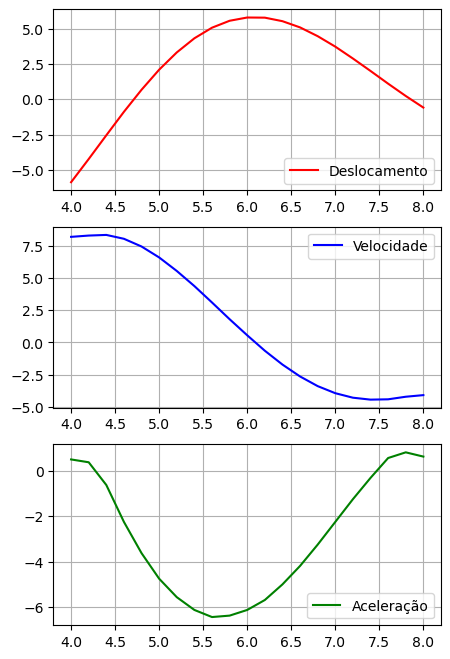

In [11]:
# Solução utilizando vetor de zeros e atualizando-o
import numpy as np
import matplotlib.pyplot as plt
#Dados
t=np.arange(4,8.2,0.2)
x=np.array([-5.87, -4.23, -2.55, -0.89, 0.67, 2.09, 3.31, 4.31,
            5.06, 5.55, 5.78, 5.77, 5.52, 5.08, 4.46, 3.72, 2.88,
            2.00,1.10, 0.23, -0.59])

def derive(X,Y):                               # Derivadas
    dx=np.zeros(len(x))                        # Vetores de derivadas
    i=0                                        # Primeiro elemento do vetor
    dx[i] = (Y[i+1] - Y[i] ) / (X[i+1]-X[i])   # Progressiva
    i=-1                                       # Último elemento do vetor
    dx[i] = (Y[i] - Y[i-1] ) / (X[i]-X[i-1])  # Regressiva
    for i in range(1,len(x)-1):                # Elementos intermediários 
        dx[i] = (Y[i+1] - Y[i-1])/ (X[i+1]-X[i-1]) # Central
    return dx

def graf(t,x,vel,acc):
    labels=['Deslocamento','Velocidade','Aceleração']
    colors=['r','b','g']
    plt.figure(figsize=(5,8))
    for i,j in enumerate([x,vel,acc]):   
        plt.subplot(3,1,i+1)
        plt.plot(t,j,label = labels[i],color=colors[i])
        plt.legend(),plt.grid(True)

vel,acc = derive(t,x), derive(t,derive(t,x))
graf(t,x,vel,acc)

# Diferenciação numérica via Série de Taylor

## Conceito

**Diferenciação Numérica usando a expansão da Série de Taylor (ST)**

- A partir da expansão em série de Taylor pode-se deduzir as fórmulas de diferenças finitas progressiva, regressiva e central, anteriormente apresentadas.
-  Essas fórmulas fornecem uma estimativa da derivada em um ponto usando valores de pontos em sua vizinhança.
- O número de pontos utilizados nos cálculos varia com a fórmula, e os pontos podem estar à frente, atrás ou em ambos os lados do ponto onde se calcula a derivada. 
- Uma vantagem da utilização da expansão em ST na dedução das fórmulas está no fato de ela fornecer uma estimativa do *erro de truncamento* presente na aproximação.


**Diferença finita progressiva com dois pontos para a derivada primeira**



* $f(x_{i + 1})$ aproximado pela série de Taylor em termos do valor da função e de suas derivadas no ponto $x_i$ resulta em:
$$f(x_{i+1}) = f(x_i)+f'(x_i)h + \frac{f''(x_i)}{2!}h^2 + \frac{f'''(x_i)}{3!}h^3 + \frac{f^{(4)}(x_i)}{4!}h^4 + ...$$
em que $h=x_{i+1} - x_i$ é a distância entre os pontos.

* Reescrevendo as equações *com dois termos e um resíduo* ($x_i$) (valor entre $x_i$ e $x_{i+1}$) tem-se:

$$f(x_{i+1}) = f(x_i)+f'(x_i)h + \frac{f''(x_i)}{2!}h^2$$

* Isolando-se o *termo de interesse* $f'(x_i)$ tem-se:
$$f'(x_i) = \frac{ f(x_{i+1}) - f(x_i) }{h} - \frac{f''(\xi)}{2!}h $$
* Um valor aproximado de $f'(x_i)$ introduz um erro de truncamento (discretização). 
* Declarando como zero o termo de $f(\xi)$ o erro de truncamento é da ordem de h( escrito como $O(h)$), por ser este proporcional àquele.


**Portanto:**

* Erro de truncamento - (erro dado em função da distância entre pontos) vale:
    $$ Erro\ de\  truncamento = \frac{f''(\xi)}{2!}h = O(h)$$
    
* Aproximação da derivada primeira finita progressiva por Série de Taylor:
    $$f'(x_i) = \frac{ f(x_{i+1}) - f(x_i) }{h} - O(h) $$


**A mesma estrutura de aproximação para a derivada primeira é usada, portanto, para:**

* Diferença finita regressiva com dois pontos resultando em:
        $$f'(x_i) = \frac{ f(x_i) - f(x_{i-1}) }{h} - O(h) $$

* Diferença finita central com dois pontos resultando em:
        $$f'(x_i) = \frac{ f(x_{i+1}) - f(x_{i-1})}{h} - O(h^2) $$
    
Na aproximação por diferença central o erro de truncamento é da ordem de $h^2$.
Isso indica que a aproximação por diferença central fornece uma aproximação mais precisa para a derivada!


## Sumário de aproximações de derivadas finitas por Série de Taylor

### Aproximação de derivadas finitas por Série de Taylor - *Derivada primeira*


* **Derivada primeira com 2 pontos**

    - Diferença progressiva - $\displaystyle f'(x_i)=\frac{f(x_{i+1}) -f(x_i)}{h}$, com $O(h)$
    - Diferença regressiva - $\displaystyle f'(x_i)=\frac{f(x_{i}) -f(x_{i-1})}{h}$, com $O(h)$
    - Diferença central - $\displaystyle f'(x_i)=\frac{f(x_{i+1}) -f(x_{i-1})}{h}$, com $O(h^2)$


* **Derivada primeira com 3 pontos**
  
    - Diferença progressiva - $\displaystyle f'(x_i)=\frac{-3f(x_i) + 4f(x_{i+1}) -f(x_{i+2})}{2h}$, com $O(h^2)$
    - Diferença regressiva - $\displaystyle f'(x_i)=\frac{f(x_{i-2}) - 4f(x_{i-1}) + 3f(x_i)}{2h}$, com $O(h^2)$
        
    
* **Derivada primeira com 4 pontos - necessita de  $x_{i-2} \ a\  x_{i+1}$**
    
    - Diferença central \\ $\displaystyle f'(x_i)=\frac{f(x_{i-2}) -8f(x_{i-1}) + 8f(x_{i+1}) - f(x_{i+2})}{12h}$, com $O(h^4)$


### Aproximação de derivadas finitas por Série de Taylor - *Derivada segunda*


* **Derivada segunda com 3 pontos**
  
    * Diferença progressiva - $\displaystyle f''(x_i)=\frac{f(x_i) - 2f(x_{i+1}) + f(x_{i+2})}{h^2}$, com $O(h)$
    * Diferença regressiva - $\displaystyle f''(x_i)=\frac{f(x_{i-2}) -2f(x_{i-1}) + f(x_i)}{h^2}$, com $O(h)$
    * Diferença central - $\displaystyle f''(x_i)=\frac{f(x_{i-1}) - 2f(x_{i}) + f(x_{i+1})}{h^2}$, com $O(h^2)$

* **Derivada segunda com 4 pontos**
  
   * Diferença progressiva - $\displaystyle f''(x_i)=\frac{2f(x_i) - 5f(x_{i+1}) +4f(x_{i+2}) - f(x_{i+3}) }{h^2}$, com $O(h^2)$
   * Diferença regressiva - $\displaystyle f''(x_i)=\frac{ - f(x_{i-3}) + 4f(x_{i-2}) -5f(x_{i-1})+ 2f(x_i)}{h^2}$, com $O(h^2)$
        
  
* **Derivada segunda com 5 pontos - central necessita de $x_{i-2} \ a\  x_{i+2}$**
   
   * Diferença central 
    $\displaystyle f''(x_i)=\frac{ -f(x_{i-2}) +16f(x_{i-1}) -30f(x_i) +16f(x_{i+1})-f(x_{i+2}))}{12h^2}$, com $O(h^4)$


### Aproximação de derivadas finitas por Série de Taylor - *Derivada terceira*

* **Derivada terceira com 4 pontos**
    
    - Diferença progressiva - $\displaystyle f'''(x_i)=\frac{ -f(x_i) + 3f(x_{i+1}) -3 f(x_{i+2}) +f(x_{i+3})}{h^3}$, com $O(h)$
    - Diferença regressiva - $\displaystyle f'''(x_i)=\frac{ -f(x_{i-3}) +3f(x_{i-2}) -3f(x_{i-1}) + f(x_i)}{h^3}$, com $O(h)$
    - Diferença central - $\displaystyle f'''(x_i)=\frac{ -f(x_{i-2}) + 2f(x_{i-1}) - 2f(x_{i+1}) + f(x_{i+2})}{2h^3}$ com $O(h^2)$
* **Derivada terceira com 5 pontos**
    - Diferença progressiva - $\displaystyle f'''(x_i)=\frac{ - 5f(x_{i}) +18f(x_{i+1}) - 24f(x_{i+2}) +14f(x_{i+3}) - 3f(x_{i+4}) }{2h^3}$, com $O(h^2)$
    - Diferença regressiva - $\displaystyle f'''(x_i)=\frac{ 3f(x_{i-4}) -14f(x_{i-3}) +24f(x_{i-2}) - 18f(x_{i-1})+ 5f(x_i)}{2h^3}$, com $O(h^2)$
    
* **Derivada terceira com 6 pontos - central necessita de $x_{i-2} \ a\  x_{i+3}$**
   - Diferença central 
    $\displaystyle f'''(x_i)=\frac{ f(x_{i-3}) - 8f(x_{i-2}) +13f(x_{i-1})-13f(x_{i+1}) +8f(x_{i+2}) - f(x_{i+3}))}{8h^3}$, com $O(h^4)$

## Exercício comparativo

Considere a função $f(x)=\frac{2^x}{x}$. Calcule numericamente a derivada segunda no ponto $x = 2$ aplicando a fórmula de diferença central com três pontos, usando:

* os pontos x = 1,8, x = 2 e x = 2,2.
* os pontos x = 1,9, x = 2 e x = 2,1.
**Solução**
    
Solução analítica - A derivada segunda da função $f(x)=\frac{2^x}{x} $ é
    $$ f''(x)= \frac{2^x[ln(2)^2]}{x} - \frac{2.2^x[ln(2)]}{x^2} + \frac{2.2^x}{x^3}$$ de modo que o valor da derivada em $x = 2$ é $\textbf{f''(2) = 0,5746}$.

In [18]:
import sympy as sp
f=lambda x:(2**x)/x
def derivada(k,ordem=1): 
        x = sp.Symbol('x')
        fun = k(x)    
        dh=sp.diff(fun,x,ordem)              
        return sp.lambdify(x,dh,'numpy') 
df = derivada(f,2)   
print('Derivada analítica:',round(df(2),6))

# ************************************
a,b =[1.8,2,2.2],[1.9,2,2.1]
def der_st(X):
    h=X[0]-X[1]
    y=[2**x/x for x in X]
    df=(y[0]-2*y[1]+y[2])/h**2 # central
    return round(df,6)
print('Item a:',der_st(a),'\nItem b:', der_st(b))

# ************************************
#Erros
df2=round(df(2),4)
e_a=round(100*(der_st(a)-df2)/df2,4)
e_b=round(100*(der_st(b)-df2)/df2,4)
print(f'Erro item a {e_a}%')
print(f'Erro item b {e_b}%')

Derivada analítica: 0.574612
Item a: 0.577482 
Item b: 0.575324
Erro item a 0.5016%
Erro item b 0.126%


# Versões dos códigos

Explore a lógica de programação, estruturação de pensamento, comandos e sintaxes para construir novos códigos.

In [19]:
'''
Versão 00 - Derivada analítica sem biblioteca auxilar e derivadas numéricas progressiva, central e regressiva para os pontos
X=[2,3,4]
'''
# *****************************************************************************
# Lista de valores
X=[2,3,4]
# Ponto de análise
ponto_p=3
# Função filtro para localizar o ponto_p na lista
i=filter(lambda n:n == ponto_p,X)
# Índice de locação do ponto na lista X
i=X.index(ponto_p)

# *****************************************************************************
# Função de análise f(x)=x³
f=lambda x:x**3
# *****************************************************************************
# Derivada Analítica incluída manualmente
df = lambda x:3*x**2

# *****************************************************************************
der = df(ponto_p)
# Derivada numérica
dprog  =( f(X[i+1]) - f(X[i]) ) / (X[i+1]-X[i])
dcentr =( f(X[i+1]) - f(X[i-1]))/ (X[i+1]-X[i-1])
dregr  =( f(X[i]) - f(X[i-1]) ) / (X[i]-X[i-1])

# *****************************************************************************
# Resultados
print('-'*50)
print("RESULTADOS:")
print('-'*50)
print("Dif.Analítica \tDif.Prog\tDif.Central\tDif.Regr")
print(f" \t{der}\t  {dprog}         \t  {dcentr}     \t   {dregr}")

# *****************************************************************************
# Resultados do erros
E=[]
E.append(round(abs(dprog-der)/der,2))
E.append(round(abs(dcentr-der)/der,2))
E.append(round(abs(dregr-der)/der,2))
print(f"\n Erros:\t\t {E[0]*100}%        \t  {E[1]*100}%     \t   {E[2]*100}%")


--------------------------------------------------
RESULTADOS:
--------------------------------------------------
Dif.Analítica 	Dif.Prog	Dif.Central	Dif.Regr
 	27	  37.0         	  28.0     	   19.0

 Erros:		 37.0%        	  4.0%     	   30.0%


In [8]:
'''
Versão 01 - Derivada analítica com biblioteca auxilar e derivadas numéricas progressiva, central e regressiva para os pontos
X=[2,3,4]
'''
import sympy as sp
# *****************************************************************************
# Lista de valores
X=[2,3,4]
# Ponto de análise
ponto_p=3
# Função filtro para localizar o ponto_p na lista
i=filter(lambda n:n == ponto_p,X)
# Índice de locação do ponto na lista X
i=X.index(ponto_p)

# *****************************************************************************
# Função de análise f(x)=x³
f=lambda x:x**3
# *****************************************************************************
# Função para derivada analítica com auxílio da biblioteca sympy
def derivada(k): 
    x = sp.Symbol('x')
    fun = k(x)    
    dh=sp.diff(fun,x,1)              # Derivada primeira
    return sp.lambdify(x,dh,'numpy') 

# # *****************************************************************************
# Derivada Analítica incluída automaticamente a partir da função 'derivada' criada
df1=derivada(f)

deriv = df1(ponto_p)
# Derivada numérica
dprog  =( f(X[i+1]) - f(X[i]) ) / (X[i+1]-X[i])
dcentr =( f(X[i+1]) - f(X[i-1]))/ (X[i+1]-X[i-1])
dregr  =( f(X[i]) - f(X[i-1]) ) / (X[i]-X[i-1])

# # *****************************************************************************
# Resultados
print('-'*50)
print("RESULTADOS:")
print('-'*50)
print("Dif.Analítica \tDif.Prog\tDif.Central\tDif.Regr")
print(f" \t{deriv}\t  {dprog}         \t  {dcentr}     \t   {dregr}")

# # *****************************************************************************
# Resultados do erros
E=[]
for i in [dprog,dcentr,dregr]:
    E.append(round(abs(i-deriv)/deriv,2))
print(f"\n Erros:\t\t {E[0]*100}%        \t  {E[1]*100}%     \t   {E[2]*100}%")

--------------------------------------------------
RESULTADOS:
--------------------------------------------------
Dif.Analítica 	Dif.Prog	Dif.Central	Dif.Regr
 	27	  37.0         	  28.0     	   19.0

 Erros:		 37.0%        	  4.0%     	   30.0%


In [22]:
'''
Versão 02 - Derivada analítica com biblioteca auxilar e derivadas numéricas progressiva, central e regressiva com interação do usuário
'''
import sympy as sp
# *****************************************************************************
# Lista de valores
entrada = input("Insira os pontos do domínio separados por vírgula: ").split(',')
X = list(map(int, entrada))
ponto_p= int(input("Informe o ponto de referência da lista para cálculo da derivada numérica"))

# Função filtro para localizar o ponto_p na lista
i=filter(lambda n:n == ponto_p,X)
# Índice de locação do ponto na lista X
i=X.index(ponto_p)

# *****************************************************************************
# Função de análise f(x)=x³
f=lambda x:x**3
# *****************************************************************************
# Função para derivada analítica com auxílio da biblioteca sympy
def derivada(k): 
    x = sp.Symbol('x')
    fun = k(x)    
    dh=sp.diff(fun,x,1)              # Derivada primeira
    return sp.lambdify(x,dh,'numpy') 

# # *****************************************************************************
# Derivada Analítica incluída automaticamente a partir da função 'derivada' criada
df1=derivada(f)

deriv = df1(ponto_p)
# Derivada numérica
dprog  =( f(X[i+1]) - f(X[i]) ) / (X[i+1]-X[i])
dcentr =( f(X[i+1]) - f(X[i-1]))/ (X[i+1]-X[i-1])
dregr  =( f(X[i]) - f(X[i-1]) ) / (X[i]-X[i-1])

# # *****************************************************************************
# Resultados
print('-'*50)
print("RESULTADOS:")
print('-'*50)
print("Dif.Analítica \tDif.Prog\tDif.Central\tDif.Regr")
print(f" \t{deriv}\t  {dprog}         \t  {dcentr}     \t   {dregr}")

# # *****************************************************************************
# Resultados do erros
E=[]
for i in [dprog,dcentr,dregr]:
    E.append(round(abs(i-deriv)/deriv,2))
print(f"\n Erros:\t\t {E[0]*100}%    \t  {E[1]*100}%     \t   {E[2]*100}%")

Insira os pontos do domínio separados por vírgula:  21,22,23,24,25
Informe o ponto de referência da lista para cálculo da derivada numérica 23


--------------------------------------------------
RESULTADOS:
--------------------------------------------------
Dif.Analítica 	Dif.Prog	Dif.Central	Dif.Regr
 	1587	  1657.0         	  1588.0     	   1519.0

 Erros:		 4.0%    	  0.0%     	   4.0%


In [4]:
'''
Versão 01 - Solução em classe sem utilizar o método construtor init
'''
import sympy as sp

class DifNumeric():   
# Lista de valores
    def dados_entrada():
        entrada = input("Insira os pontos do domínio separados por vírgula: ").split(',')
        X = list(map(int, entrada))
        ponto_p= int(input("Informe o ponto de referência da lista para cálculo da derivada numérica"))

        # Função filtro para localizar o ponto_p na lista
        i=filter(lambda n:n == ponto_p,X)
        # Índice de locação do ponto na lista X
        i=X.index(ponto_p)

        return X,ponto_p,i

    # Função para derivada analítica com auxílio da biblioteca sympy
    def derivada(k): 
        x = sp.Symbol('x')
        fun = k(x)    
        dh=sp.diff(fun,x,1)              # Derivada primeira

        return sp.lambdify(x,dh,'numpy') 


    def calculo_derivadas(f,X,ponto_p):
    # # *****************************************************************************
    # Derivada Analítica incluída automaticamente a partir da função 'derivada' criada
        df1=derivada(f)

        deriv = df1(ponto_p)
        # Derivada numérica
        dprog  =( f(X[i+1]) - f(X[i]) ) / (X[i+1]-X[i])
        dcentr =( f(X[i+1]) - f(X[i-1]))/ (X[i+1]-X[i-1])
        dregr  =( f(X[i]) - f(X[i-1]) ) / (X[i]-X[i-1])

        return dprog,dcentr,dregr,deriv    
    # # *****************************************************************************
    # Resultados

    # # *****************************************************************************
    # Resultados do erros
    def calculo_erros(dprog,dcentr,dregr,deriv):
        E=[]
        for i in [dprog,dcentr,dregr]:
            E.append(round(abs(i-deriv)/deriv,2))    
        return E

    def resultados(E,dprog,dcentr,dregr,deriv):
        print('-'*50)
        print("RESULTADOS:")
        print('-'*50)
        print("Dif.Analítica \tDif.Prog\tDif.Central\tDif.Regr")
        print(f" \t{deriv}\t  {dprog}         \t  {dcentr}     \t   {dregr}")
        print(f"\n Erros:\t\t {E[0]*100}%    \t  {E[1]*100}%     \t   {E[2]*100}%")
        

f=lambda x:x**3
# *****************************************************************************
s=DifNumeric
X,ponto_p,i = s.dados_entrada()       
dprog,dcentr,dregr,deriv = s.calculo_derivadas(f,X,ponto_p)
E=s.calculo_erros(dprog,dcentr,dregr,deriv)
s.resultados(E,dprog,dcentr,dregr,deriv)

Insira os pontos do domínio separados por vírgula:  21,22,23,24
Informe o ponto de referência da lista para cálculo da derivada numérica 22


--------------------------------------------------
RESULTADOS:
--------------------------------------------------
Dif.Analítica 	Dif.Prog	Dif.Central	Dif.Regr
 	1452	  1519.0         	  1453.0     	   1387.0

 Erros:		 5.0%    	  0.0%     	   4.0%


In [6]:
'''
Versão 01 - Solução em classe com  o método construtor init
'''
import sympy as sp

class DifNumeric():
    def __init__(self,f):
        X,ponto_p,i = self.dados_entrada()       
        dprog,dcentr,dregr,deriv = self.calculo_derivadas(f,X,ponto_p,i)
        E=self.calculo_erros(dprog,dcentr,dregr,deriv)
        self.resultados(E,dprog,dcentr,dregr,deriv)    
    
# Lista de valores
    def dados_entrada(self):
        entrada = input("Insira os pontos do domínio separados por vírgula: ").split(',')
        X = list(map(int, entrada))
        ponto_p= int(input("Informe o ponto de referência da lista para cálculo da derivada numérica"))

        # Função filtro para localizar o ponto_p na lista
        i=filter(lambda n:n == ponto_p,X)
        # Índice de locação do ponto na lista X
        i=X.index(ponto_p)

        return X,ponto_p,i

    # Função para derivada analítica com auxílio da biblioteca sympy
    def derivada(self,k): 
        x = sp.Symbol('x')
        fun = k(x)    
        dh=sp.diff(fun,x,1)              # Derivada primeira

        return sp.lambdify(x,dh,'numpy') 


    def calculo_derivadas(self,f,X,ponto_p,i):
    # # *****************************************************************************
    # Derivada Analítica incluída automaticamente a partir da função 'derivada' criada
        df1=self.derivada(f)

        deriv = df1(ponto_p)
        # Derivada numérica
        dprog  =( f(X[i+1]) - f(X[i]) ) / (X[i+1]-X[i])
        dcentr =( f(X[i+1]) - f(X[i-1]))/ (X[i+1]-X[i-1])
        dregr  =( f(X[i]) - f(X[i-1]) ) / (X[i]-X[i-1])

        return dprog,dcentr,dregr,deriv    

    # # *****************************************************************************
    # Resultados do erros
    def calculo_erros(self,dprog,dcentr,dregr,deriv):
        E=[]
        for i in [dprog,dcentr,dregr]:
            E.append(round(abs(i-deriv)/deriv,2))    
        return E

    def resultados(self,E,dprog,dcentr,dregr,deriv):
        print('-'*50)
        print("RESULTADOS:")
        print('-'*50)
        print("Dif.Analítica \tDif.Prog\tDif.Central\tDif.Regr")
        print(f" \t{deriv}\t  {dprog}         \t  {dcentr}     \t   {dregr}")
        print(f"\n Erros:\t\t {E[0]*100}%    \t  {E[1]*100}%     \t   {E[2]*100}%")

        
f=lambda x:x**3
# *****************************************************************************
s=DifNumeric(f) 

Insira os pontos do domínio separados por vírgula:  21,22,23,24
Informe o ponto de referência da lista para cálculo da derivada numérica 22


--------------------------------------------------
RESULTADOS:
--------------------------------------------------
Dif.Analítica 	Dif.Prog	Dif.Central	Dif.Regr
 	1452	  1519.0         	  1453.0     	   1387.0

 Erros:		 5.0%    	  0.0%     	   4.0%


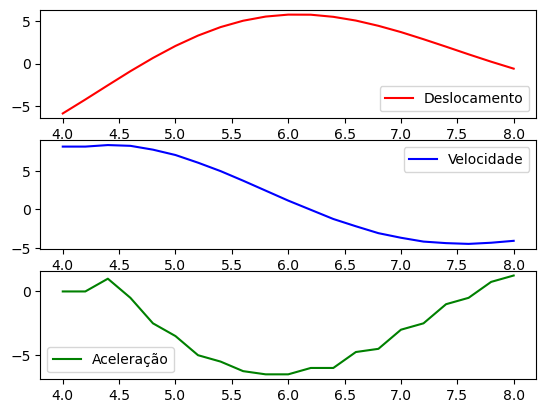

In [23]:
# Solução utilizando lista e adicionando valores a cada iteração.
import numpy as np
import matplotlib.pyplot as plt

#Dados
t=np.array([4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0,
            6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8, 8.0])
x=np.array([-5.87,-4.23,-2.55,-0.89,0.67,2.09,3.31,4.31,5.06,5.55,
            5.78,5.77,5.52,5.08,4.46,3.72,2.88,2.00,1.10,0.23,-0.59])
def derive(X,Y):                               # Derivadas
    dx=[]
    for i,j in enumerate(X):
        if i==0:
            dx.append((Y[i+1] - Y[i] ) / (X[i+1]-X[i])) # Progressiva
        elif i==len(X):
            dx.append((Y[i+1] - Y[i-1])/ (X[i+1]-X[i-1])) # Central
        else:  
            dx.append((Y[i] - Y[i-1] ) / (X[i]-X[i-1])) # Regressiva
    return dx

vel = derive(t,x)
acc = derive(t,vel)

plt.subplot(3,1,1)
plt.plot(t,x,label = 'Deslocamento',color='r')
plt.legend()
plt.subplot(3,1,2)
plt.plot(t,vel,label='Velocidade',color='b')
plt.legend()
plt.subplot(3,1,3)
plt.plot(t,acc,label='Aceleração',color='g')
plt.legend()